### **Librerias**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 20

## **Etapa 0: Crear Data Set**

### PIB

In [112]:
PIB = pd.read_csv('./Datos/PIB.csv', sep=',',encoding='latin-1')
PIB = PIB[(PIB['year']>=2000) & (PIB['year']<=2020)]
PIB['year'] = PIB['year'].astype('int')
PIB['key'] = [(str((PIB.iloc[i,4])).lower()+'-'+str(PIB.iloc[i,6])) for i in range(len(PIB['country_name']))]
PIB = PIB.sort_values(by=['country_name'])
PIB.shape

(4410, 11)

### Complejidad Economica

In [113]:
Data_ECI = pd.read_csv('./Datos/ECI_Data.csv',sep=',',encoding='latin-1')
Data_ECI = Data_ECI.transpose()
Data_ECI = Data_ECI[2:].transpose()
Data_ECI.dropna(inplace=True)

In [114]:
complexity = []
pais = []
año = []
for i in range(len(Data_ECI.iloc[:,:0])):
    for j in range(len(Data_ECI.iloc[0,:-3])):
        pais.append(Data_ECI.iloc[i,22])
        año.append((Data_ECI.columns[j]))
        complexity.append(Data_ECI.iloc[i,j])
ECI = pd.DataFrame()
ECI['Pais'] = pais
ECI['ECI'] = complexity
ECI['año'] = año
ECI['año'] = ECI['año'].astype('int')
ECI['key'] = [(str(ECI.iloc[i,0]).lower()+'-'+str(ECI.iloc[i,2])) for i in range(len(ECI['año']))]
ECI = ECI.sort_values(by=['Pais'])
ECI.shape

(1953, 4)

### Poblacion

In [115]:
Data_Poblacion = pd.read_csv('./Datos/Poblacion_Data.csv', sep=',',encoding='latin-1')
Data_Poblacion.dropna(inplace=True)

In [116]:
Poblacion = []
pais_p = []
año = []
for i in range(len(Data_Poblacion.iloc[:,:0])):
    for j in range(len(Data_Poblacion.iloc[0,4:-2])):
        pais_p.append(Data_Poblacion.iloc[i,0])
        año.append(int(Data_Poblacion.columns[j+4]))
        Poblacion.append(Data_Poblacion.iloc[i,j+4])
Population = pd.DataFrame()
Population['Pais'] = pais_p
Population['Poblacion'] = Poblacion
Population['año'] = año
Population['key'] = [(str(Population.iloc[i,0]).lower()+'-'+str(Population.iloc[i,2])) for i in range(len(Population['año']))]
Population = Population.sort_values(by=['Pais'])

### Region

In [117]:
cordenada = pd.read_csv('./Datos/country-coord.csv', sep=',',encoding='latin-1')
cordenada['country'] = [(str(cordenada.iloc[i,0]).lower()) for i in range(len(cordenada['Country']))]
cordenada.shape

(244, 4)

In [118]:
cordenada.iloc[0,2]

65.0

In [119]:
cordenada['Ecuador'] = [1 if (cordenada.iloc[i,1]<=27 and cordenada.iloc[i,1]>=-27) else 0 for i in range(len(cordenada['country']))]

### Union DataFrames

In [120]:
Data_final = PIB.merge(Population,left_on='key',right_on='key').merge(ECI,left_on='key',right_on='key')
Data_final = Data_final[['Pais_x', 'Poblacion', 'total_gdp_million','ECI','año_x']]
Data_final['country'] = [(str(Data_final.iloc[i,0]).lower()) for i in range(len(Data_final['Pais_x']))]
Data_final = pd.merge(Data_final, cordenada, on ='country', how ='inner')
Data_final = Data_final[['Pais_x', 'Poblacion', 'total_gdp_million','ECI','año_x','Ecuador']]


## **Etapa 1: Entender los Datos**

In [121]:
Data_final.head(5)

,Pais_x,Poblacion,total_gdp_million,ECI,año_x,Ecuador
0,Algeria,42705368.0,171767.40370,-1.042459,2019,0
1,Algeria,43451666.0,145009.18150,-1.206390,2020,0
2,Algeria,30774621.0,54790.39275,-1.064802,2000,0
3,Algeria,31200985.0,54744.71281,-0.804064,2001,0
4,Algeria,31624696.0,56760.35587,-0.994074,2002,0


In [122]:
Data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pais_x             1575 non-null   object 
 1   Poblacion          1575 non-null   float64
 2   total_gdp_million  1575 non-null   float64
 3   ECI                1575 non-null   float64
 4   año_x              1575 non-null   int64  
 5   Ecuador            1575 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 74.0+ KB


In [123]:
def timeline(columna):
    time = pd.pivot_table(Data_final,values=columna,columns=['año_x'],aggfunc='mean')
    return time
    

C:\Users\PC\AppData\Local\Temp\ipykernel_52236\3716522708.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


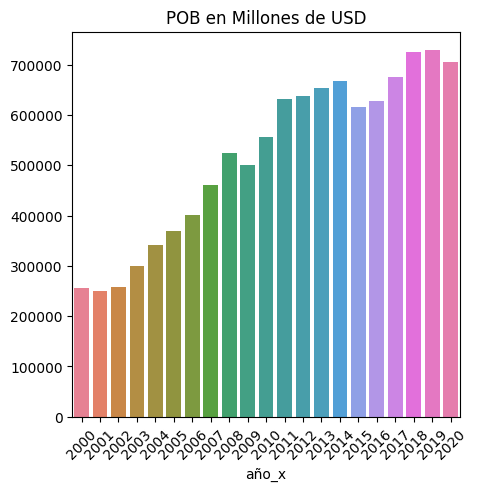

In [124]:
fig,ax = plt.subplots(1,sharex=True,figsize=(5,5))
ax = sns.barplot(timeline('total_gdp_million'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('POB en Millones de USD')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_52236\1064075117.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


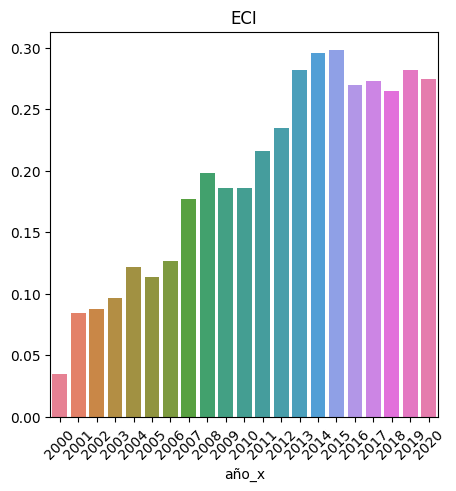

In [125]:
fig,ax = plt.subplots(1,sharex=True,figsize=(5,5))
ax = sns.barplot(timeline('ECI'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('ECI')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_52236\2662339452.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


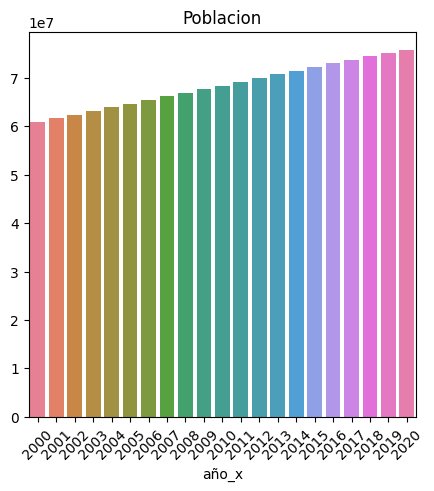

In [126]:
fig,ax = plt.subplots(1,sharex=True,figsize=(5, 5))
ax = sns.barplot(timeline('Poblacion'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Poblacion')
plt.show()